The goal of this project is building an artificial intelligence (AI) program to optimize a quantum circuit compiler. Here are the steps, knowledge requirements, and data needs for such a project:

Steps to Undertake the Project
Understand Quantum Computing Basics:

- Quantum Mechanics Fundamentals: Learn about qubits, superposition, entanglement, and quantum gates.
 - Quantum Algorithms: Study algorithms like Grover's and Shor's, which illustrate the potential of quantum computing.
 - Quantum Circuits: Understand the construction and execution of quantum circuits, including common gates like Hadamard, CNOT, and Pauli gates.
- Study Quantum Circuit Compilers:

 - Compilation Process: Learn how quantum circuits are transformed from high-level algorithms to low-level machine instructions.
 - Optimization Techniques: Investigate existing techniques for optimizing quantum circuits, such as gate minimization, error correction, and resource management.
- Learn Relevant AI/ML Techniques:

 - Machine Learning Basics: Get familiar with supervised, unsupervised, and reinforcement learning.
 - Optimization Algorithms: Study algorithms like genetic algorithms, simulated annealing, or neural networks, which can be used to optimize quantum circuits.
 - Reinforcement Learning: This is particularly useful for optimization problems and may be applicable to your project.
- Acquire and Process Data:

 - Quantum Circuit Datasets: Find or generate datasets of quantum circuits that can be used for training your AI model. These can include different types of circuits, their gates, and performance metrics.
 - Performance Metrics: Collect data on performance metrics such as execution time, fidelity, and error rates for various circuits and optimization techniques.
- Develop the AI Model:

 - Model Selection: Choose an appropriate model architecture for your optimization task. This could be a neural network, reinforcement learning agent, or another suitable model.
 - Training the Model: Use your dataset to train the AI model, ensuring it learns to optimize quantum circuits effectively.
 - Evaluation: Test the model on unseen circuits to evaluate its performance and make adjustments as needed.
- Implement the Quantum Circuit Compiler:

 - Integration: Integrate your AI model with a quantum circuit compiler. This involves feeding the circuit through your model and applying the suggested optimizations.
 - Testing: Test the integrated system with various circuits to ensure it works correctly and provides meaningful optimizations.
- Documentation and Presentation:

 - Document Your Work: Keep detailed records of your research, development process, and results.
 - Prepare Your Presentation: Develop a clear and concise presentation to explain your project, the methods used, and the results obtained.
- Knowledge Requirements
 - Quantum Computing:

 - Quantum mechanics principles
 - Quantum gates and circuits
 - Quantum algorithms
 - Artificial Intelligence and Machine Learning:

 - Basics of machine learning
 - Optimization algorithms
 - Reinforcement learning
- Programming and Tools:

 - Programming languages such as Python
 - Quantum computing frameworks (Qiskit, Cirq, Q#)
 - AI/ML libraries (TensorFlow, PyTorch)
- Data Handling:

 - Data collection and preprocessing
 - Handling quantum circuit datasets
- Data Requirements
 - Quantum Circuit Data:

 - Examples of quantum circuits with various configurations
Performance metrics (execution time, error rates, etc.)
Optimization Outcomes:

 - Records of optimized vs. non-optimized circuits
Metrics to compare before and after optimization

**Introduction:**

- Define the problem and objectives
- Background on quantum circuits and compilers
- Literature Review:

 - Existing quantum circuit optimization techniques
 - Relevant AI/ML methods
- Methodology:

 - Detailed description of the AI model
 - Data collection and preprocessing steps
- Implementation:

 - Model training process
 - Integration with the quantum circuit compiler
- Results and Discussion:

- Performance evaluation of the AI-optimized compiler
Comparison with existing methods
- Conclusion:

 - Summary of findings
 - Potential future work and improvements


**Project success benchmark: **
Compiler has a reduction of x circuit depth, y compile time, z swap gate usage, n accuracy of circuit translation + failure rate, m execution time

optimization includes gate reduction and qubit scheduling based on hardware (investigate hardware avaliable for testing (IBM Eagle 127 Qubits))

optimization strategy: teach AI basic zx calculus, break up the circuit into 1 and 2 qubit operations, apply optimization algorithm (find out which one(s) to use), determine which physical qubit scheduling patter is most optomized to reduce swap gate usage, train model on high volume of circuits, test model on previously optimized circuits through IBM Transpile service, scale up project from 10 qubits, to 50 qubits, to 100 qubits. Verfify that circuit optimization is functionally identical and that optimization does not exceed benchmark targets.

1. learn:
quantum computing, quantum mechanics, quantum algorithms, quantum circuits, quantum hardware, quantum information science

2. study quantum circuit compilers, optimization techniques


3. learn machine learning, reinforment learning, optimization

4. aquire and clean machine learning data in the form of quantum algorithms

circuit zoo library, random circuit, and MNISQ circuit database, common circuits

circuits can be translated between Q#, Cirq, and Qiskit through QASM 2.0/3.0

lab 3 code copy


In [ ]:
### Install Qiskit and relevant packages, if needed
### IMPORTANT: Make sure you are using python 3.10 or 3.11 for compatibility of the required packages
%pip install qiskit[visualization]==1.0.2
%pip install qiskit-ibm-runtime
%pip install qiskit-aer
%pip install graphviz
%pip install qiskit-transpiler-service


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 31.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 8.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.4/130.4 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 12.4 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.53.7-py3-none-any.whl size=340285 sha256=1029b808dc62d374a56b1d45151ef8d52740a27d25c1a5788fc97bccb3951728
  Stored in directory: /root/.cache/pip/wheels/8e/54/ad/63e8f

In [ ]:
### Save API Token, if needed

%set_env QXToken=d87cf3581eb6ebe7359f68f4c291a5de3492681bc5771ea0883755cbe075940a7ccabd89b28d03ac0bb14484cde73bac587cb0fdcabc4360ffd051fffc665c6c

# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=d87cf3581eb6ebe7359f68f4c291a5de3492681bc5771ea0883755cbe075940a7ccabd89b28d03ac0bb14484cde73bac587cb0fdcabc4360ffd051fffc665c6c


In [ ]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_transpiler_service.transpiler_service import TranspilerService

In [ ]:
#NUM_QUBITS = 10

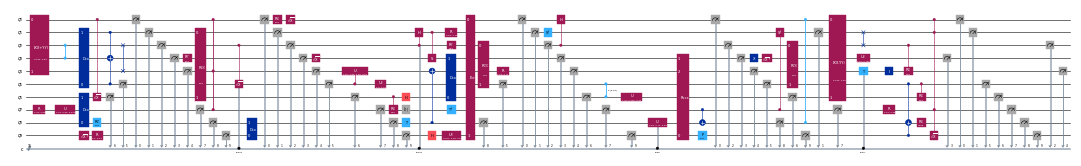

In [ ]:
from qiskit.circuit.random import random_circuit
'''
Parameters

num_qubits (int) – number of quantum wires
depth (int) – layers of operations (i.e. critical path length)
max_operands (int) – maximum qubit operands of each gate (between 1 and 4)
measure (bool) – if True, measure all qubits at the end
conditional (bool) – if True, insert middle measurements and conditionals
reset (bool) – if True, insert middle resets
seed (int) – sets random seed (optional)
'''
#https://docs.quantum.ibm.com/api/qiskit/0.40/qiskit.circuit.random.random_circuit

#circ = random_circuit(10, 10, measure=True)
#circ.draw(output='mpl')
circ = random_circuit(
  num_qubits = 10,
  depth = 10,
  max_operands = 4,
  measure = True,
  conditional = True,
  reset = True,
  seed = 42
  )
circ.draw(fold=-1, output="mpl", style="iqp", scale=0.2)


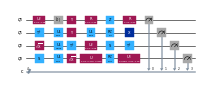

In [ ]:
def make_random_circuit(
  num_qubits,
  depth,
  max_operands,
  measure,
  conditional,
  reset,
  seed
  ):

  circ = random_circuit(
  num_qubits,
  depth,
  max_operands,
  measure,
  conditional,
  reset,
  seed
  )
  circ.draw(fold=-1, output="mpl", style="iqp", scale=0.2)
  return circ

circ = make_random_circuit(
  num_qubits = np.random.randint(1,9),
  depth = np.random.randint(1,9),
  max_operands = np.random.randint(1,4),
  measure = True,
  conditional = True,
  reset = True,
  seed = 42
  )
circ.draw(fold=-1, output="mpl", style="iqp", scale=0.2)


In [ ]:
circuit = EfficientSU2(NUM_QUBITS, entanglement="circular", reps=1).decompose()

print(f"Original circuit -> Depth: {circuit.depth()}, CNOTs: {circuit.num_nonlocal_gates()}")
circuit.draw(fold=-1, output="mpl", style="iqp", scale=0.2)

NameError: name 'NUM_QUBITS' is not defined

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="d87cf3581eb6ebe7359f68f4c291a5de3492681bc5771ea0883755cbe075940a7ccabd89b28d03ac0bb14484cde73bac587cb0fdcabc4360ffd051fffc665c6c",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    # overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()


In [ ]:

transpiler_ai_false = TranspilerService(
    # Add your code here
    backend_name="ibm_brisbane",
    ai="false",
    optimization_level=3,
)


In [ ]:
circuit_ai_false = transpiler_ai_false.run(circ)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Transpiled without AI -> Depth: 10, CNOTs: 0


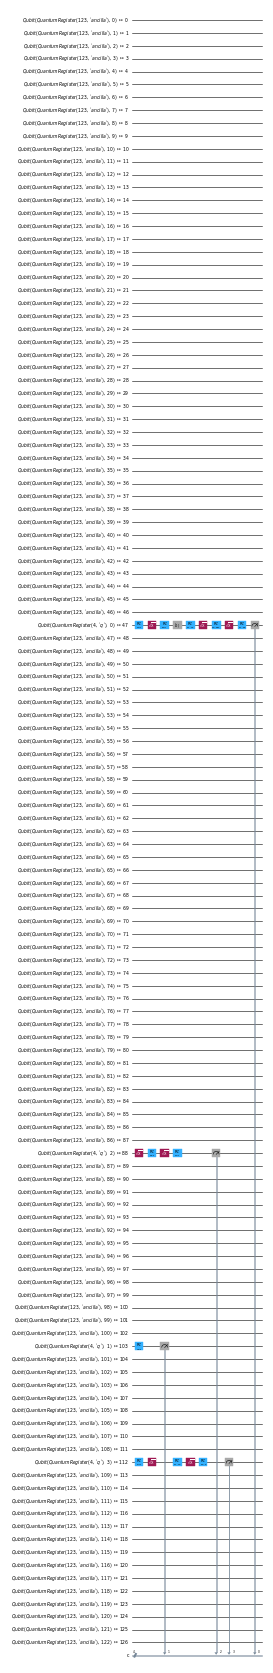

In [ ]:
print(f"Transpiled without AI -> Depth: {circuit_ai_false.depth()}, CNOTs: {circuit_ai_false.num_nonlocal_gates()}")
circuit_ai_false.draw(fold=-1, output="mpl", scale=0.2)

In [ ]:
circuit_ai_false.data

[CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[2.810896227087685]), qubits=(Qubit(QuantumRegister(127, 'q'), 47),), clbits=()), CircuitInstruction(operation=Instruction(name='sx', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(127, 'q'), 47),), clbits=()), CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[6.96552616195705]), qubits=(Qubit(QuantumRegister(127, 'q'), 47),), clbits=()), CircuitInstruction(operation=Instruction(name='reset', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(127, 'q'), 47),), clbits=()), CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[-1.0533598414608356]), qubits=(Qubit(QuantumRegister(127, 'q'), 47),), clbits=()), CircuitInstruction(operation=Instruction(name='sx', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(127, 'q'), 47),), clbits=()), CircuitInstruction(operation=Ins

In [ ]:
transpiler_ai_true = TranspilerService(
    # Add your code here
    backend_name="ibm_brisbane",
    ai="true",
    optimization_level=3,
    )

In [ ]:
circuit_ai_true = transpiler_ai_true.run(circ)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
ERROR:qiskit_transpiler_service.wrappers.base:The request FAILED
ERROR:qiskit_transpiler_service.wrappers.base:Failed to get a result for transpile: The background task 1c59c98b-5137-4906-84c2-86718764d12e FAILED
ERROR:qiskit_transpiler_service.wrappers.base:Service error.


TranspilerError: 'Service error.'

In [ ]:
print(f"Transpiled with AI -> Depth: {circuit_ai_true.depth()}, CNOTs: {circuit_ai_true.num_nonlocal_gates()}")
circuit_ai_true.draw(fold=-1, output="mpl", scale=0.2)

In [ ]:
# Transpiling locally using Qiskit SDK
service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

In [ ]:
# Run and compile results
num_qubits = [10, 20]
num_cnots_local = []
num_cnots_with_ai = []
num_cnots_without_ai = []

for nq in num_qubits:
    circuit = EfficientSU2(nq, entanglement="circular", reps=1).decompose()

    # Using the Transpiler locally on Qiskit
    circuit_local = pm.run(circuit)
    # Using the transpiler service without AI
    circuit_without_ai = transpiler_ai_false.run(circuit)
    # Using the transpiler service with AI
    circuit_with_ai = transpiler_ai_true.run(circuit)

    num_cnots_local.append(circuit_local.num_nonlocal_gates())
    num_cnots_without_ai.append(circuit_without_ai.num_nonlocal_gates())
    num_cnots_with_ai.append(circuit_with_ai.num_nonlocal_gates())

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


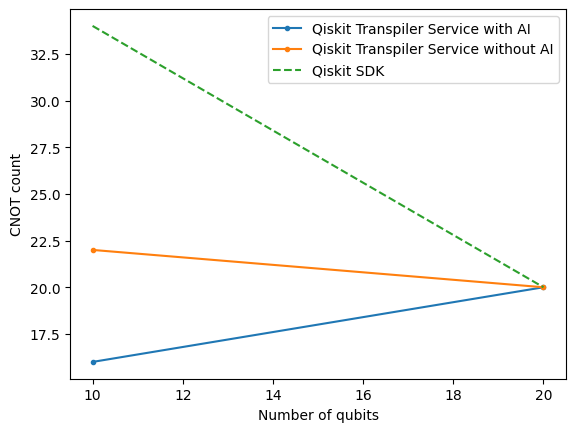

In [ ]:
plt.plot(num_qubits, num_cnots_with_ai, '.-')
plt.plot(num_qubits, num_cnots_without_ai, '.-')
plt.plot(num_qubits, num_cnots_local, '--')
plt.xlabel("Number of qubits")
plt.ylabel("CNOT count")
plt.legend(["Qiskit Transpiler Service with AI", "Qiskit Transpiler Service without AI", "Qiskit SDK"])

5. develop benchmark data

verify accuracy at low (10) qubit count on local simulator, then scale up to medium (50) qubits on HPC (AWS or OSU) (parallelize shots on different nodes), then scale up to high (100 qubits) on IBM QPU

two circuits can be verified as essentially the same if they return the same answers with some (10%) tolerance.

6. devlop AI model: build, train, evaluate


7. documentation and presentation

Resources

- https://arxiv.org/pdf/2405.13196
- https://www.ibm.com/quantum/blog/ai-transpiler-passes
- https://docs.quantum.ibm.com/transpile/qiskit-transpiler-service
- https://docs.quantum.ibm.com/transpile/ai-transpiler-passes

- https://quantumalgorithmzoo.org/

- https://github.com/FujiiLabCollaboration/MNISQ-quantum-circuit-dataset

- https://arxiv.org/pdf/2306.16627


- https://www.nature.com/articles/s41598-020-72469-7
- https://patentimages.storage.googleapis.com/05/a7/2f/c959169907f86f/US20110138344A1.pdf
- https://pennylane.ai/qml/glossary/what-is-a-toffoli-gate/#:~:text=The%20Toffoli%20gate%20is%20represented%20in%20matrix%20form%20as%20below.&text=If%20the%20control%20qubit%2C%20c,functioning%20as%20a%20NAND%20gate.

- https://arxiv.org/pdf/2402.14396
- https://www.classiq.io/insights/quantum-software-optimization
- https://arxiv.org/pdf/2307.10120
- https://www.researchgate.net/publication/344392207_Quantum_circuit_optimization_using_quantum_Karnaugh_map

- https://en.wikipedia.org/wiki/SAT_solver#:~:text=On%20input%20a%20formula%20over,values%20of%20x%20and%20y.
- https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.passes.SabreSwap
- https://arxiv.org/pdf/2308.03344
- https://arxiv.org/pdf/1704.08670
- https://www.nature.com/articles/s41586-022-05434-1#:~:text=Surface%20codes30%2C31%2C32,XL%20and%20ZL.
- https://pennylane.ai/qml/demos/tutorial_zx_calculus/
- https://mathai2023.github.io/papers/34.pdf
- https://www.geeksforgeeks.org/minimization-of-boolean-functions/
- http://marc.bouissou.free.fr/BDMP_PSAM6.pdf
- https://allbooksfordownloading.wordpress.com/wp-content/uploads/2017/01/digital-design-and-computer-architecture-by-david-and-sarah-harris.pdf
- Quantum circuit optimization using
quantum Karnaugh map
- A kinetic Monte Carlo approach for Boolean logic functionality in gold nanoparticle networks

- https://pennylane.ai/qml/demos/tutorial_zx_calculus/
- https://docs.quantum.ibm.com/api/qiskit/0.28/qiskit.transpiler.passes.BIPMapping
- https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#qiskit.circuit.QuantumCircuit.data
- https://arxiv.org/pdf/2305.02939
- https://arxiv.org/pdf/2405.13196